## Glassnode API | Python

In [1]:
import json
import requests
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import plot


# insert your API key here
API_KEY = '2It9FiAZB1mHp7VcjmmI9XzjPp4'

"""
make API request to get all endpoints
"""
res = requests.get(
    'https://api.glassnode.com/v2/metrics/endpoints',
    params={'api_key': API_KEY}
)

# convert to pandas dataframe
endpointData = pd.read_json(res.text)

# review endpoint data
print(endpointData.columns)

Index(['path', 'tier', 'assets', 'currencies', 'resolutions', 'formats'], dtype='object')


In [2]:
# view all endpoint URLs
print(endpointData.path)

0       /v1/metrics/addresses/sending_to_exchanges_count
1      /v1/metrics/addresses/receiving_from_exchanges...
2                            /v1/metrics/addresses/count
3                    /v1/metrics/addresses/sending_count
4                  /v1/metrics/addresses/receiving_count
                             ...                        
497           /v1/metrics/institutions/qbtc_holdings_sum
498              /v1/metrics/institutions/qbtc_flows_sum
499        /v1/metrics/institutions/qbtc_premium_percent
500                /v1/metrics/institutions/qbtc_aum_sum
501       /v1/metrics/institutions/qbtc_market_price_usd
Name: path, Length: 502, dtype: object


In [3]:
# view specific endpoint
print(endpointData.path[0])

/v1/metrics/addresses/sending_to_exchanges_count


In [4]:
# view specific endpoint tier
print(endpointData.tier[0])

3


In [5]:
# all endpoints for specific tier 
print(endpointData.path[endpointData.tier == 1])

2                            /v1/metrics/addresses/count
3                    /v1/metrics/addresses/sending_count
4                  /v1/metrics/addresses/receiving_count
5                     /v1/metrics/addresses/active_count
6               /v1/metrics/addresses/new_non_zero_count
                             ...                        
492                    /v1/metrics/signals/altcoin_index
493                   /v1/metrics/signals/btc_risk_index
494              /v1/metrics/signals/mcap_returns_vs_btc
495    /v1/metrics/signals/l1_native_tokens_returns_v...
496         /v1/metrics/signals/ecosystem_momentum_index
Name: path, Length: 73, dtype: object


In [6]:
# all endpoints for specific tier AND lower
print(endpointData.path[endpointData.tier <= 2])

2                         /v1/metrics/addresses/count
3                 /v1/metrics/addresses/sending_count
4               /v1/metrics/addresses/receiving_count
5                  /v1/metrics/addresses/active_count
6            /v1/metrics/addresses/new_non_zero_count
                            ...                      
497        /v1/metrics/institutions/qbtc_holdings_sum
498           /v1/metrics/institutions/qbtc_flows_sum
499     /v1/metrics/institutions/qbtc_premium_percent
500             /v1/metrics/institutions/qbtc_aum_sum
501    /v1/metrics/institutions/qbtc_market_price_usd
Name: path, Length: 336, dtype: object


In [7]:
# find index/row number of endpoint by path
endpointRow = endpointData[
                endpointData.path == '/v1/metrics/market/price_usd_ohlc']
print(endpointRow)

                                  path  tier  \
355  /v1/metrics/market/price_usd_ohlc     1   

                                                assets currencies resolutions  \
355  [{'symbol': 'BTC', 'name': 'Bitcoin', 'tags': ...   [NATIVE]   [1h, 24h]   

         formats  
355  [JSON, CSV]  


In [8]:
# supported assets by endpoint // in a DataFrame
print(pd.DataFrame(endpointData.assets[endpointRow.index[0]]))

    symbol             name                    tags
0      BTC          Bitcoin                   [top]
1      ETH         Ethereum                   [top]
2      LTC         Litecoin                   [top]
3     TUSD          TrueUSD     [erc20, stablecoin]
4    stETH  Lido Staked ETH                 [erc20]
..     ...              ...                     ...
124  ARMOR            ARMOR           [erc20, defi]
125    DHT       dHedge DAO           [erc20, defi]
126  Nsure    Nsure Network           [erc20, defi]
127    NDX  Indexed Finance           [erc20, defi]
128    DDX        DerivaDAO  [erc20, exchangeToken]

[129 rows x 3 columns]


In [9]:
# view data resolution, granularity
print(endpointData.resolutions[endpointRow.index[0]])

['1h', '24h']


### APE Coin

In [10]:
"""
make API request to get candlestick data
"""
res = requests.get(
    'https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
    params={'a': 'APE', 'api_key': API_KEY, 'i': '24h'}
)

In [11]:
# convert to pandas dataframe
candleData = pd.read_json(res.text, convert_dates=['t'])

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
# rename columns
candleData = candleData.rename(columns={'t': 'Date', 'o': 'Candles'})

candleData

,Date,Candles
0,2020-10-01,"{'c': 0.669047489539, 'h': 0.817236347243, 'l'..."
1,2020-10-02,"{'c': 0.52921737655289, 'h': 0.731040083605, '..."
2,2020-10-03,"{'c': 0.84314754154425, 'h': 0.89387537784734,..."
3,2020-10-04,"{'c': 0.7543572811529, 'h': 0.86316926830242, ..."
4,2020-10-05,"{'c': 1.19509961448969, 'h': 1.24887432523049,..."
5,2020-10-06,"{'c': 1.12133919144578, 'h': 1.602658338451960..."
6,2020-10-07,"{'c': 1.03194446836878, 'h': 1.19040726963927,..."
7,2020-10-08,"{'c': 0.91359121326412, 'h': 1.03200813056543,..."
8,2020-10-09,"{'c': 1.05745738177729, 'h': 1.13378869649868,..."
9,2020-10-10,"{'c': 1.08961673439559, 'h': 1.14842615092397,..."


In [14]:
# set index to date
candleData = candleData.set_index('Date')

candleData

,Candles
Date,
2020-10-01,"{'c': 0.669047489539, 'h': 0.817236347243, 'l'..."
2020-10-02,"{'c': 0.52921737655289, 'h': 0.731040083605, '..."
2020-10-03,"{'c': 0.84314754154425, 'h': 0.89387537784734,..."
2020-10-04,"{'c': 0.7543572811529, 'h': 0.86316926830242, ..."
2020-10-05,"{'c': 1.19509961448969, 'h': 1.24887432523049,..."
2020-10-06,"{'c': 1.12133919144578, 'h': 1.602658338451960..."
2020-10-07,"{'c': 1.03194446836878, 'h': 1.19040726963927,..."
2020-10-08,"{'c': 0.91359121326412, 'h': 1.03200813056543,..."
2020-10-09,"{'c': 1.05745738177729, 'h': 1.13378869649868,..."


In [15]:
# turn candle dictionaries into individual series
candleData = candleData.Candles.apply(pd.Series)

In [16]:
# rename columns
candleData = candleData.rename(columns={'c': 'Close', 'h': 'High', 
                                        'l': 'Low', 'o': 'Open'})

In [17]:
candleData

,Close,High,Low,Open
Date,,,,
2020-10-01,6.690475e-01,8.172363e-01,6.076752e-01,7.515292e-01
2020-10-02,5.292174e-01,7.310401e-01,5.071573e-01,6.686000e-01
2020-10-03,8.431475e-01,8.938754e-01,2.896363e-01,5.293064e-01
2020-10-04,7.543573e-01,8.631693e-01,6.836463e-01,8.631693e-01
2020-10-05,1.195100e+00,1.248874e+00,6.720124e-01,7.542910e-01
2020-10-06,1.121339e+00,1.602658e+00,8.667301e-01,1.195138e+00
2020-10-07,1.031944e+00,1.190407e+00,9.076658e-01,1.139330e+00
2020-10-08,9.135912e-01,1.032008e+00,8.875068e-01,1.032008e+00
2020-10-09,1.057457e+00,1.133789e+00,8.949599e-01,9.123501e-01


In [18]:
# generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=candleData.index,
                open=candleData['Open'],
                high=candleData['High'],
                low=candleData['Low'],
                close=candleData['Close'])])

# open figure in browser
plot(fig, auto_open=True)

'temp-plot.html'

In [22]:
"""
make request to get total addresses // APE
"""
res = requests.get(
    'https://api.glassnode.com/v1/metrics/addresses/count',
    params={'a': 'APE', 'api_key': API_KEY}
)

In [23]:
# convert to pandas dataframe
addressData = pd.read_json(res.text, convert_dates=['t'])

In [24]:
# rename columns
addressData = addressData.rename(columns={'t': 'Date', 'v': 'numAddresses'})

In [25]:
# set index to date
addressData = addressData.set_index('Date')

In [26]:
addressData

,numAddresses
Date,
2022-02-14,5
2022-02-15,5
2022-02-16,5
2022-02-17,6
2022-02-18,8
2022-02-19,8
2022-02-20,8
2022-02-21,8
2022-02-22,11


<AxesSubplot:xlabel='Date'>

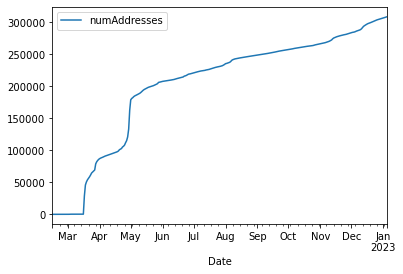

In [27]:
# plot address data
addressData.plot()

In [28]:
"""
make a request to get % Circulating Supply // APE
"""

res2 = requests.get(
    'https://api.glassnode.com/v1/metrics/supply/current',
    params={'a': 'APE', 'api_key': API_KEY}
)

In [29]:
# convert to pandas dataframe
supplyData = pd.read_json(res2.text, convert_dates=['t'])

In [30]:
# rename columns
supplyData = supplyData.rename(columns={'t': 'Date', 'v': 'LongTermSupply'})

In [31]:
supplyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            827 non-null    datetime64[ns]
 1   LongTermSupply  827 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


In [32]:
# set index to date
supplyData = supplyData.set_index('Date')

<AxesSubplot:xlabel='Date'>

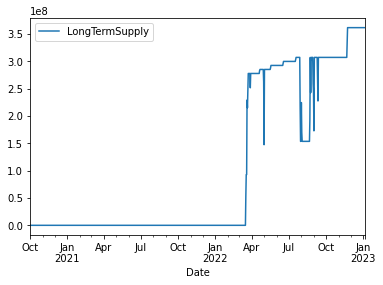

In [33]:
# plot supply data
supplyData.plot()

### MANA (Decentraland)

In [34]:
"""
make API request to get candlestick data
"""
res3 = requests.get(
    'https://api.glassnode.com/v1/metrics/market/price_usd_ohlc',
    params={'a': 'MANA', 'api_key': API_KEY, 'i': '24h'}
)

In [35]:
# convert to pandas dataframe
candleData = pd.read_json(res3.text, convert_dates=['t'])

In [36]:
# rename columns
candleData = candleData.rename(columns={'t': 'Date', 'o': 'Candles'})

candleData

,Date,Candles
0,2018-02-16,"{'c': 0.133514, 'h': 0.134458, 'l': 0.130372, ..."
1,2018-02-17,"{'c': 0.139312, 'h': 0.142754, 'l': 0.130625, ..."
2,2018-02-18,"{'c': 0.126378, 'h': 0.141236, 'l': 0.124624, ..."
3,2018-02-19,"{'c': 0.129084, 'h': 0.13539199999999998, 'l':..."
4,2018-02-20,"{'c': 0.11454099999999999, 'h': 0.13033, 'l': ..."
5,2018-02-21,"{'c': 0.10939399999999999, 'h': 0.119502, 'l':..."
6,2018-02-22,"{'c': 0.10818699999999999, 'h': 0.115560000000..."
7,2018-02-23,"{'c': 0.112135, 'h': 0.113938, 'l': 0.10444, '..."
8,2018-02-24,"{'c': 0.106027, 'h': 0.11558299999999999, 'l':..."
9,2018-02-25,"{'c': 0.105735, 'h': 0.108869, 'l': 0.100979, ..."


In [37]:
# set index to date
candleData = candleData.set_index('Date')

candleData

,Candles
Date,
2018-02-16,"{'c': 0.133514, 'h': 0.134458, 'l': 0.130372, ..."
2018-02-17,"{'c': 0.139312, 'h': 0.142754, 'l': 0.130625, ..."
2018-02-18,"{'c': 0.126378, 'h': 0.141236, 'l': 0.124624, ..."
2018-02-19,"{'c': 0.129084, 'h': 0.13539199999999998, 'l':..."
2018-02-20,"{'c': 0.11454099999999999, 'h': 0.13033, 'l': ..."
2018-02-21,"{'c': 0.10939399999999999, 'h': 0.119502, 'l':..."
2018-02-22,"{'c': 0.10818699999999999, 'h': 0.115560000000..."
2018-02-23,"{'c': 0.112135, 'h': 0.113938, 'l': 0.10444, '..."
2018-02-24,"{'c': 0.106027, 'h': 0.11558299999999999, 'l':..."


In [38]:
# turn candle dictionaries into individual series
candleData = candleData.Candles.apply(pd.Series)

In [39]:
# rename columns
candleData = candleData.rename(columns={'c': 'Close', 'h': 'High', 
                                        'l': 'Low', 'o': 'Open'})

In [40]:
candleData

,Close,High,Low,Open
Date,,,,
2018-02-16,0.133514,0.134458,0.130372,0.130372
2018-02-17,0.139312,0.142754,0.130625,0.133441
2018-02-18,0.126378,0.141236,0.124624,0.141236
2018-02-19,0.129084,0.135392,0.125331,0.126555
2018-02-20,0.114541,0.130330,0.113394,0.126910
2018-02-21,0.109394,0.119502,0.105799,0.114463
2018-02-22,0.108187,0.115560,0.100755,0.109298
2018-02-23,0.112135,0.113938,0.104440,0.108442
2018-02-24,0.106027,0.115583,0.102765,0.111274


In [41]:
# generate plotly figure
fig = go.Figure(data=[go.Candlestick(x=candleData.index,
                open=candleData['Open'],
                high=candleData['High'],
                low=candleData['Low'],
                close=candleData['Close'])])

# open figure in browser
plot(fig, auto_open=True)

'temp-plot.html'

In [42]:
# make request to get total addresses // MANA
res4 = requests.get(
    'https://api.glassnode.com/v1/metrics/addresses/count',
    params={'a': 'MANA', 'api_key': API_KEY}
)

In [43]:
# convert to pandas dataframe
addressData2 = pd.read_json(res4.text, convert_dates=['t'])

In [44]:
# rename columns
addressData2 = addressData2.rename(columns={'t': 'Date', 'v': 'numAddresses'})

In [45]:
# set index to date
addressData2 = addressData2.set_index('Date')

In [46]:
addressData2

,numAddresses
Date,
2017-09-06,5
2017-09-07,5
2017-09-08,5
2017-09-09,5
2017-09-10,5
2017-09-11,5
2017-09-12,5
2017-09-13,5
2017-09-14,5


<AxesSubplot:xlabel='Date'>

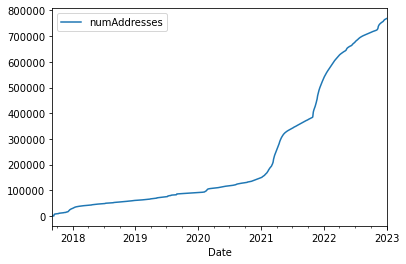

In [47]:
# plot address data
addressData2.plot()

In [51]:
"""
make a request to get % Circulating Supply // MANA
"""

res5 = requests.get(
    'https://api.glassnode.com/v1/metrics/supply/current',
    params={'a': 'MANA', 'api_key': API_KEY}
)

In [52]:
# convert to pandas dataframe
supplyData = pd.read_json(res5.text, convert_dates=['t'])

In [53]:
# rename columns
supplyData = supplyData.rename(columns={'t': 'Date', 'v': 'LongTermSupply'})

In [54]:
# set index to date
supplyData = supplyData.set_index('Date')

<AxesSubplot:xlabel='Date'>

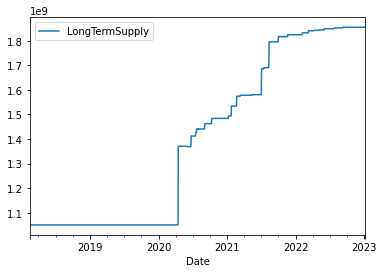

In [55]:
# plot address data
supplyData.plot()

### Pi Cycle Top Indicator - APE Coin

In [62]:
"""
make a request to Pi Cycle Top Indicator
"""

res6 = requests.get(
    'https://api.glassnode.com/v1/metrics/indicators/pi_cycle_top',
    params={'a': 'APE', 'api_key': API_KEY}
)

In [63]:
# convert to pandas dataframe
piCycleTop = pd.read_json(res6.text, convert_dates=['t'])

In [64]:
# rename columns
piCycleTop = piCycleTop.rename(columns={'t': 'Date', 'o': 'movAvgData'})

In [65]:
# set index to date
piCycleTop = piCycleTop.set_index('Date')

In [66]:
# turn dictionaries into individual series
piCycleTop = piCycleTop.movAvgData.apply(pd.Series)

<AxesSubplot:xlabel='Date'>

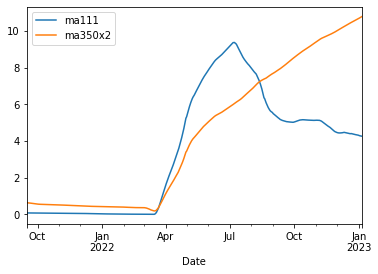

In [67]:
# plot address data
piCycleTop.plot()

### Pi Cycle Top

The Pi Cycle Top was also created by Philip Swift, and works by comparing the momentum of two moving average indicators. It compares the 111 SMA (blue) and 2 * 350 SMA (purple) of Bitcoin’s Price. These two moving averages were selected as 350 / 111 = 3.153; An approximation of the Pi number.

1. When the 111 SMA (blue) meets the 2 * 350 SMA (purple), it is an indication of an overheated market. The mid timeframe momentum reference crosses above the long timeframe momentum reference.
2. When the 111 SMA (blue) falls beneath the 2 * 350 SMA (purple), it is an indication of a deflating market that is cooling of after a period of overheating.

### Pi Cycle Top Indicator - MANA Coin

In [68]:
"""
make a request to Pi Cycle Top Indicator
"""

res7 = requests.get(
    'https://api.glassnode.com/v1/metrics/indicators/pi_cycle_top',
    params={'a': 'MANA', 'api_key': API_KEY}
)

In [69]:
# convert to pandas dataframe
piCycleTop_2 = pd.read_json(res7.text, convert_dates=['t'])

In [70]:
# rename columns
piCycleTop_2 = piCycleTop_2.rename(columns={'t': 'Date', 'o': 'movAvgData'})

In [71]:
# set index to date
piCycleTop_2 = piCycleTop_2.set_index('Date')

In [72]:
# turn dictionaries into individual series
piCycleTop_2 = piCycleTop_2.movAvgData.apply(pd.Series)

<AxesSubplot:xlabel='Date'>

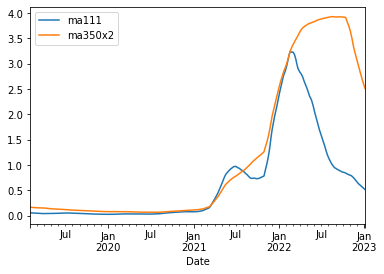

In [73]:
# plot address data
piCycleTop_2.plot()